 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
aapl_csv_path = Path('Resources/aapl_historical.csv')
algo_csv_path = Path('Resources/algo_returns.csv')
cost_csv_path = Path('Resources/cost_historical.csv')
goog_csv_path = Path('Resources/goog_historical.csv')
sp500_csv_path = Path('Resources/sp500_history.csv')
whale_csv_path = Path('Resources/whale_returns.csv')

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns


In [4]:
whale_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls


In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls


In [8]:
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns


In [10]:
algo_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
#Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
#Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
#Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [14]:
#Check Data Types
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [15]:
sp500_df["Close"].head()

Date
2019-04-23    $2933.68
2019-04-22    $2907.97
2019-04-18    $2905.03
2019-04-17    $2900.45
2019-04-16    $2907.06
Name: Close, dtype: object

In [16]:
# Fix Data Types


In [17]:
#Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$"," ")
sp500_df["Close"]

/Users/faithvadnaiskuny/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Date
2019-04-23     2933.68
2019-04-22     2907.97
2019-04-18     2905.03
2019-04-17     2900.45
2019-04-16     2907.06
                ...   
2012-10-05     1460.93
2012-10-04     1461.40
2012-10-03     1450.99
2012-10-02     1445.75
2012-10-01     1444.49
Name: Close, Length: 1649, dtype: object

In [18]:
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df["Close"].dtype

dtype('float64')

In [19]:
# Calculate Daily Returns

In [20]:
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [21]:
# Drop Nulls
sp500_df.dropna()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns = {"Close": "SP500 Daily Returns"})
sp500_df.head()

,SP500 Daily Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


In [24]:
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [25]:
# Plot daily returns of all portfolios


<AxesSubplot:xlabel='Date'>

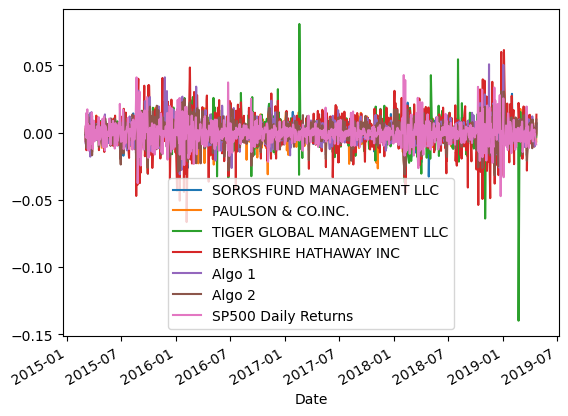

In [26]:
combined_df.plot()

#### Calculate and Plot cumulative returns.

In [27]:
# Calculate cumulative returns of all portfolios

In [28]:

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

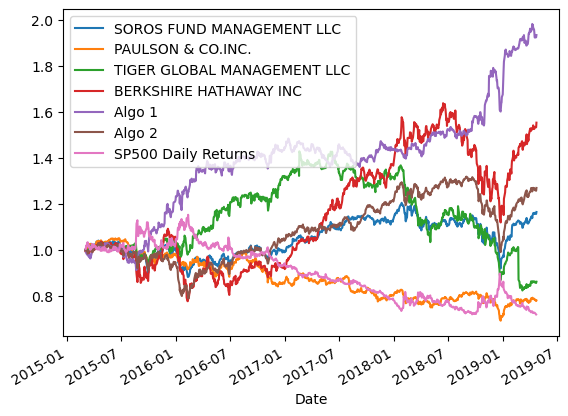

In [29]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

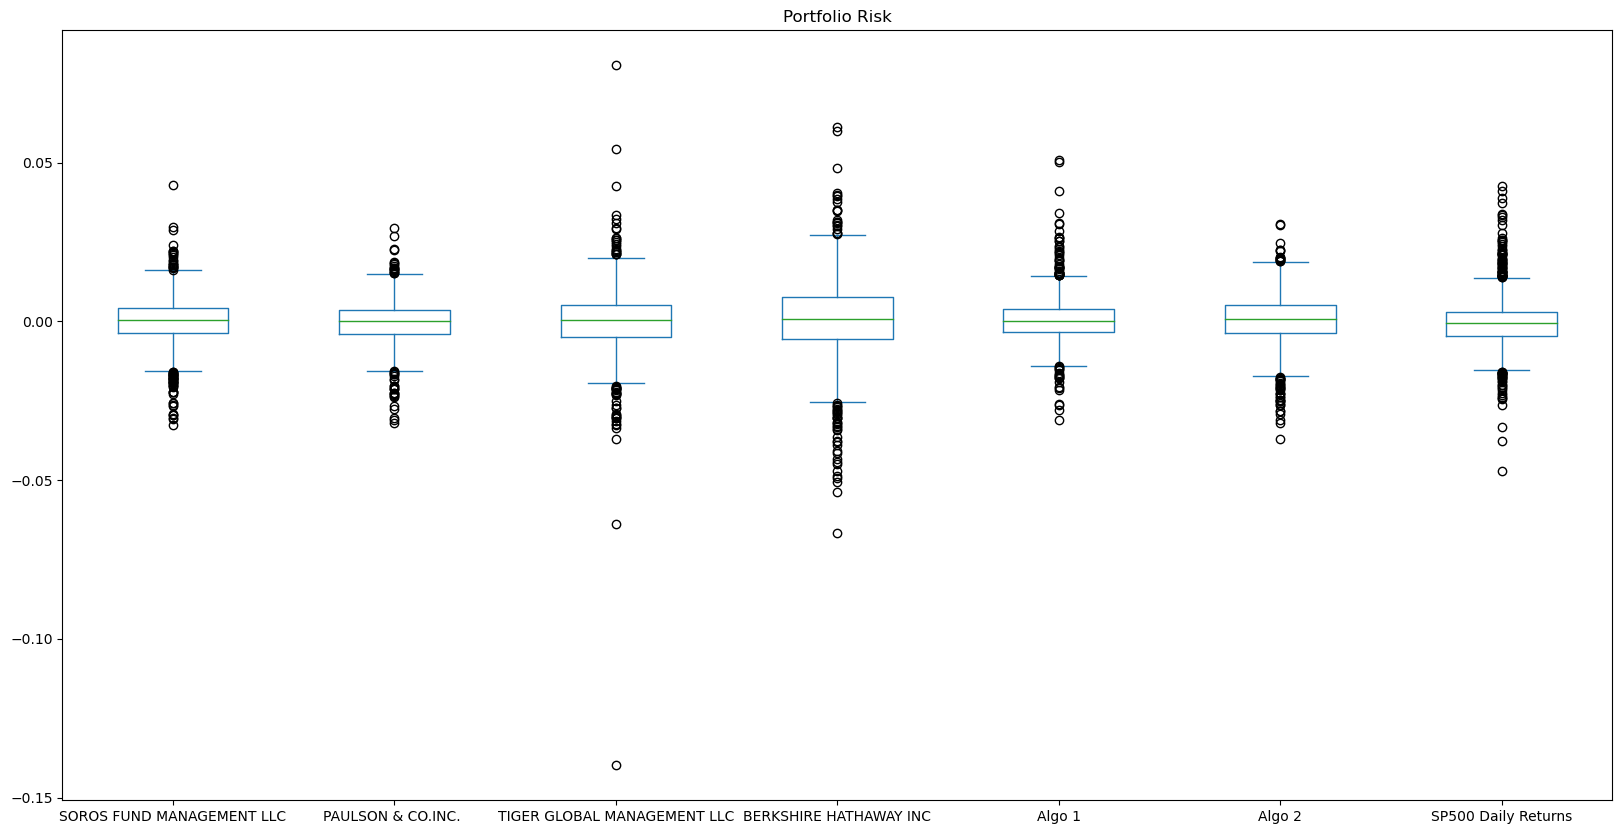

In [54]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20, 10), title="Portfolio Risk")

### Calculate Standard Deviations

In [55]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Daily Returns            0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [57]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_df["SP500 Daily Returns"].std()
# Determine which portfolios are riskier than the S&P 500
combined_df.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500 Daily Returns            False
dtype: bool

### Calculate the Annualized Standard Deviation

In [58]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std()*np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Daily Returns            0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

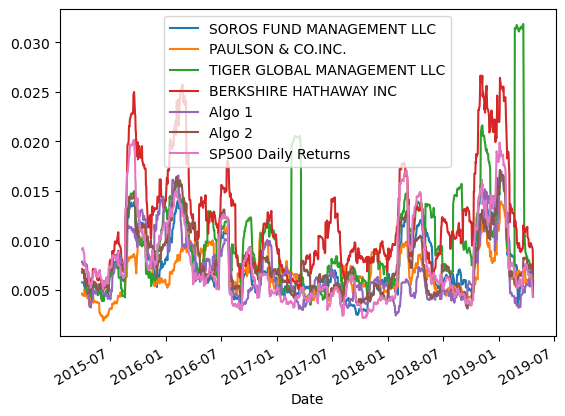

In [60]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_roll_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df_roll_std.plot()

### Calculate and plot the correlation

In [62]:
# Calculate the correlation
corr_df = combined_df.corr()
# Display de correlation matrix
corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
SP500 Daily Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

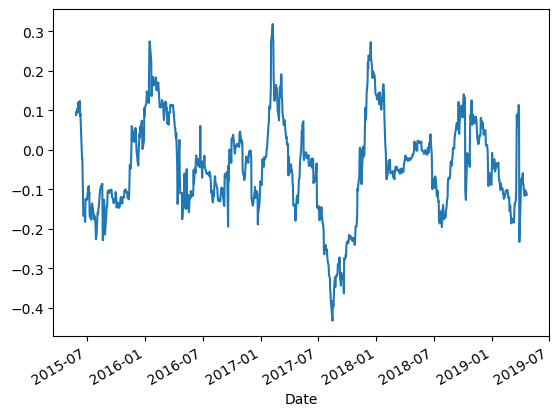

In [64]:
# Calculate covariance of a single portfolio
covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["SP500 Daily Returns"])

# Calculate variance of S&P 500
variance = combined_df["SP500 Daily Returns"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

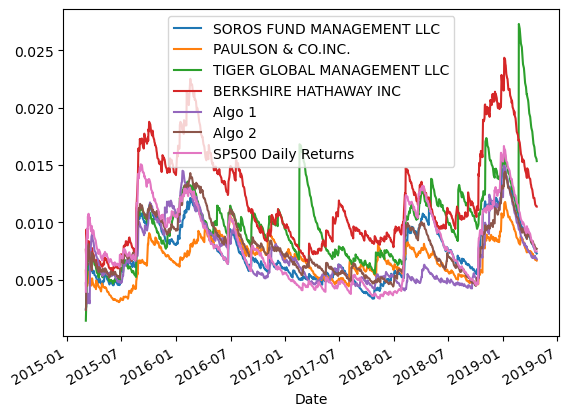

In [65]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [66]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Daily Returns           -0.518582
dtype: float64

<AxesSubplot:>

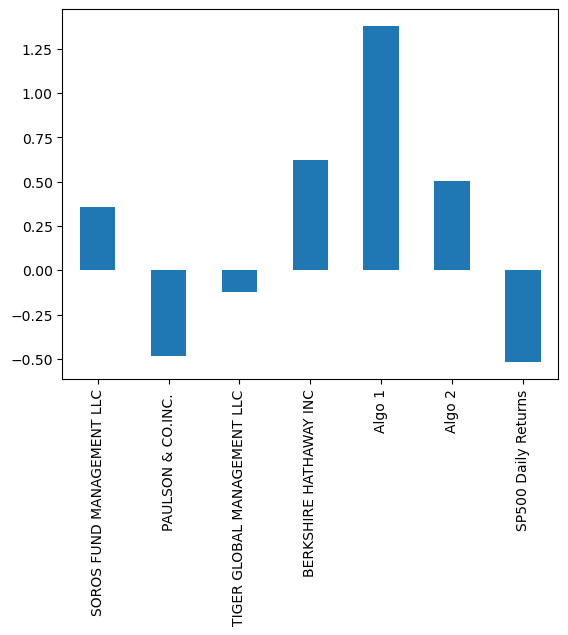

In [67]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [46]:
# Reading data from 1st stock
plug_csv_path = Path('Starter_Code/Resources/plug_historical.csv')
plug_df = pd.read_csv(plug_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
plug_df.head()

,Close
Date,
2015-03-02 16:00:00,3.13
2015-03-03 16:00:00,3.02
2015-03-04 16:00:00,2.93
2015-03-05 16:00:00,2.97
2015-03-06 16:00:00,2.97


In [47]:
# Reading data from 2nd stock
mro_csv_path = Path('Starter_Code/Resources/mro_historical.csv')
mro_df = pd.read_csv(mro_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
mro_df.head()

,Close
Date,
2015-03-02 16:00:00,27.67
2015-03-03 16:00:00,27.74
2015-03-04 16:00:00,27.61
2015-03-05 16:00:00,27.34
2015-03-06 16:00:00,26.78


In [48]:
# Reading data from 3rd stock
adm_csv_path = Path('Starter_Code/Resources/adm_historical.csv')
adm_df = pd.read_csv(adm_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
adm_df.head()

,Close
Date,
2015-03-02 16:00:00,47.85
2015-03-03 16:00:00,47.52
2015-03-04 16:00:00,47.08
2015-03-05 16:00:00,47.48
2015-03-06 16:00:00,46.25


In [49]:
# Combine all stocks into a single DataFrame
second_combined_df = pd.concat([plug_df, mro_df, adm_df], axis = "columns", join = "inner")
second_combined_df.head()

,Close,Close,Close
Date,,,
2015-03-02 16:00:00,3.13,27.67,47.85
2015-03-03 16:00:00,3.02,27.74,47.52
2015-03-04 16:00:00,2.93,27.61,47.08
2015-03-05 16:00:00,2.97,27.34,47.48
2015-03-06 16:00:00,2.97,26.78,46.25


In [42]:
# Reset Date index


In [50]:
# Reorganize portfolio data by having a column per symbol
plug_df = plug_df.rename(columns = {"Close": "PLUG"})
mro_df = mro_df.rename(columns = {"Close": "MRO"})
adm_df = adm_df.rename(columns = {"Close": "ADM"})


In [51]:

second_combined_df = pd.concat([plug_df, mro_df, adm_df], axis = "columns", join = "inner")
second_combined_df.head()

,PLUG,MRO,ADM
Date,,,
2015-03-02 16:00:00,3.13,27.67,47.85
2015-03-03 16:00:00,3.02,27.74,47.52
2015-03-04 16:00:00,2.93,27.61,47.08
2015-03-05 16:00:00,2.97,27.34,47.48
2015-03-06 16:00:00,2.97,26.78,46.25


In [52]:
# Calculate daily returns
second_combined_df = second_combined_df.pct_change()
second_combined_df.head()

,PLUG,MRO,ADM
Date,,,
2015-03-02 16:00:00,NaN,NaN,NaN
2015-03-03 16:00:00,-0.035144,0.002530,-0.006897
2015-03-04 16:00:00,-0.029801,-0.004686,-0.009259
2015-03-05 16:00:00,0.013652,-0.009779,0.008496
2015-03-06 16:00:00,0.000000,-0.020483,-0.025906


In [64]:
# Drop NAs
# Display sample date
second_daily_returns = second_combined_df.dropna().copy()
second_daily_returns.head()

,PLUG,MRO,ADM
Date,,,
2015-03-03 16:00:00,-0.035144,0.002530,-0.006897
2015-03-04 16:00:00,-0.029801,-0.004686,-0.009259
2015-03-05 16:00:00,0.013652,-0.009779,0.008496
2015-03-06 16:00:00,0.000000,-0.020483,-0.025906
2015-03-09 16:00:00,-0.020202,-0.017924,0.003027


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [65]:
# set weights
weights = [1/3, 1/3, 1/3]

#Calculate portfolio return
# Display sample data
second_daily_returns = second_daily_returns.dot(weights)
second_daily_returns

Date
2015-03-03 16:00:00   -0.013170
2015-03-04 16:00:00   -0.014582
2015-03-05 16:00:00    0.004123
2015-03-06 16:00:00   -0.015463
2015-03-09 16:00:00   -0.011700
                         ...   
2018-12-28 16:00:00   -0.001235
2018-12-31 16:00:00   -0.012494
2019-01-02 16:00:00    0.032864
2019-01-03 16:00:00   -0.021274
2019-01-04 16:00:00    0.046861
Length: 969, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame


In [69]:
combined_df ["Custom"] = second_daily_returns
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,NaN
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,NaN
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,NaN


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


In [58]:
combined_df.dropna().copy()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Daily Returns,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`


In [59]:
annualized_std_second_combined_df = second_combined_df.std() * np.sqrt(252)
annualized_std_second_combined_df.head()

PLUG    0.728624
MRO     0.498988
ADM     0.226660
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [49]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


<AxesSubplot:xlabel='Date'>

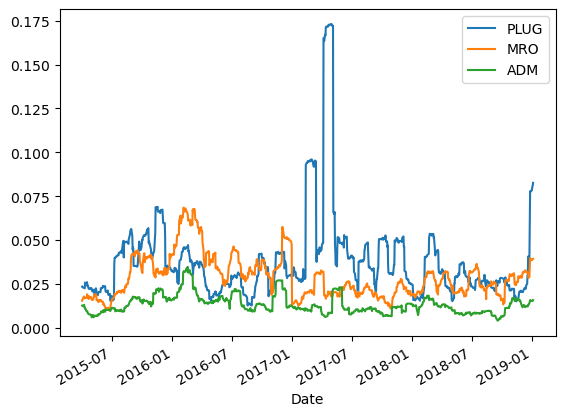

In [60]:
second_combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

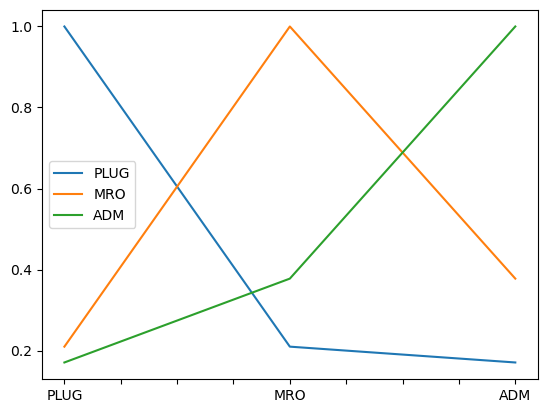

In [61]:
# Calculate and plot the correlation
second_combined_df.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [51]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualized Sharpe Ratios


In [62]:
#Calculate Annualized Sharpe Ratios

risk_free_rate_path = Path('Starter_Code/Resources/risk_free_rate.csv')
risk_free_rate = pd.read_csv(risk_free_rate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

my_portfolio_returns = pd.concat([second_daily_returns, risk_free_rate], axis='columns', join='inner')
my_portfolio_returns.head()
                                 

,0,rf_rate
Date,,


In [53]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!